In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting a random seed
np.random.seed(42)

In [3]:
# Path to save images
IMGDIR = '../images/'

In [4]:
# Loading the datasets
df = pd.read_csv('../data/cleaned_df.csv', index_col = False)
df2 = pd.read_csv('../data/data-eda-wcst-20220915.01.csv')

# Exploratory Data Analysis

In [5]:
df['Severity'].value_counts(ascending = False, normalize = True)

2    0.890728
3    0.054476
4    0.045459
1    0.009337
Name: Severity, dtype: float64

Very imbalanced classes, roughly 89.07% of the accidents in the dataset are of class 2 severity.

### Features/columns were divided into four groups, with eda done per group.

## Group 1 EDA: 

In [6]:
# Features in group 1
col_1 = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 
         'Precipitation(in)', 'Amenity', 'Bump', 'Crossing']

In [7]:
# Mapping boolean columns to integer form
for col in col_1:
    if df[col].dtypes == bool:
        df[col] = df[col].apply(lambda x: 1 if x == True else 0)

In [8]:
# Summary Statistics of the columns
for column in col_1:
    print(column,'\n')
    print(df[column].describe())
    print('\n')

Temperature(F) 

count    2.731050e+06
mean     6.181444e+01
std      1.857998e+01
min     -3.300000e+01
25%      5.000000e+01
50%      6.400000e+01
75%      7.600000e+01
max      1.960000e+02
Name: Temperature(F), dtype: float64


Humidity(%) 

count    2.731050e+06
mean     6.440027e+01
std      2.285224e+01
min      1.000000e+00
25%      4.800000e+01
50%      6.700000e+01
75%      8.300000e+01
max      1.000000e+02
Name: Humidity(%), dtype: float64


Pressure(in) 

count    2.731050e+06
mean     2.947645e+01
std      1.037208e+00
min      2.000000e-02
25%      2.932000e+01
50%      2.982000e+01
75%      3.001000e+01
max      5.890000e+01
Name: Pressure(in), dtype: float64


Visibility(mi) 

count    2.731050e+06
mean     9.099739e+00
std      2.692817e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.000000e+01
75%      1.000000e+01
max      1.400000e+02
Name: Visibility(mi), dtype: float64


Wind_Speed(mph) 

count    2.731050e+06
mean     7.194677e+00
std      5.561834e+0

In [9]:
# Creating a dataframe with only temperature and its value counts, filtering the dataframe so that 
# only temperatures with greater than or equal to 1000 accidents are included.
temp = df['Temperature(F)'].value_counts().reset_index()
temp.columns = ['Temperature(F)','Accident Cases']
temp = temp[temp['Accident Cases'] >= 1000]
temp.head(2)

,Temperature(F),Accident Cases
0,73.0,63486
1,77.0,62442


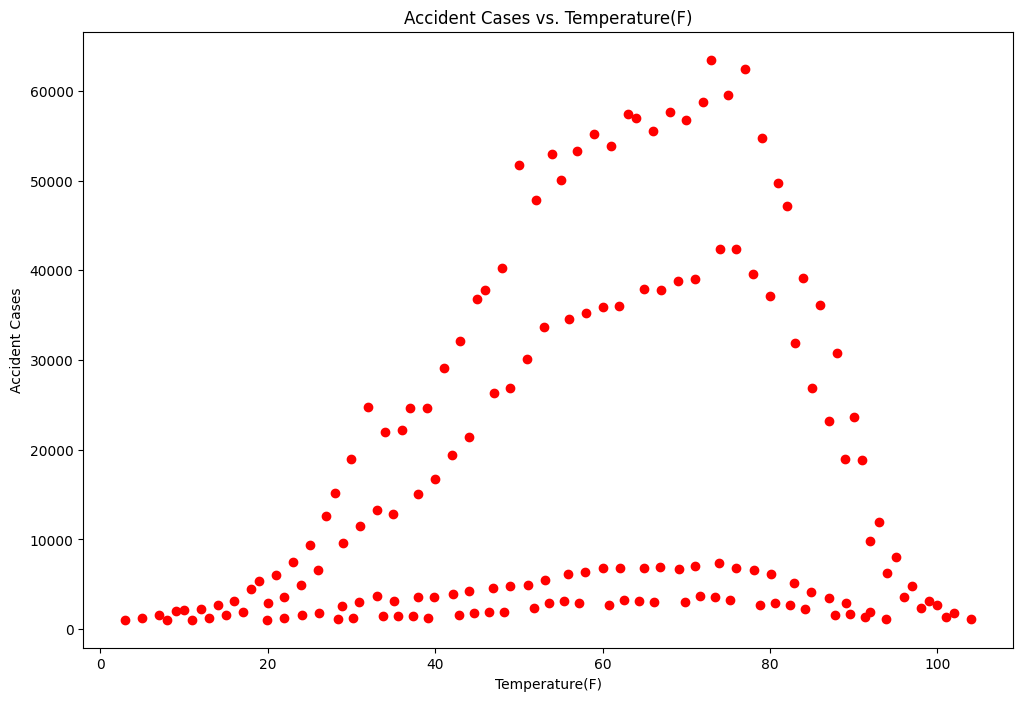

In [10]:
# Scatterplot for # of accident cases vs. temperature
plt.figure(figsize = (12,8))
plt.scatter(y = temp['Accident Cases'], x = temp['Temperature(F)'], color ='red')
plt.ylabel('Accident Cases')
plt.xlabel('Temperature(F)')
plt.title('Accident Cases vs. Temperature(F)')
plt.show();

**Interpretation**  
Maximum accident cases occurred in temperatures ranging from roughly 40 - 80 degrees Fahreheit. Other than that, there doesn't appear to be much of a relationship between temperature and the frequency of accidents.

In [11]:
# Creating a dataframe with humidity and it value counts, filtering the dataframe so that 
# only humidities with more than 500 accidents are included.
humi = df['Humidity(%)'].value_counts().reset_index()
humi.columns = ['Humidity(%)', 'Accident Cases']
humi = humi[humi['Accident Cases'] > 500]
humi.head(2)

,Humidity(%),Accident Cases
0,93.0,102097
1,100.0,94865


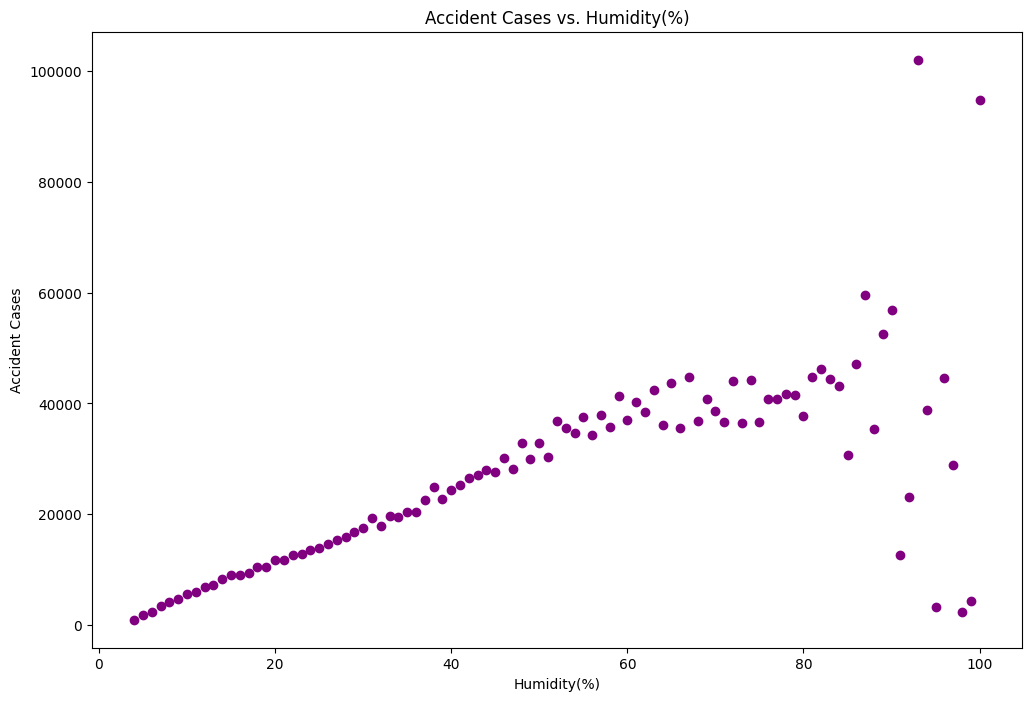

In [12]:
# Scatterplot for # of accident cases vs. humidity
plt.figure(figsize= (12,8))
plt.scatter(y = humi['Accident Cases'], x = humi['Humidity(%)'],color = 'purple')
plt.ylabel('Accident Cases')
plt.xlabel('Humidity(%)')
plt.title('Accident Cases vs. Humidity(%)')
plt.show();

**Interpretation**  
Majority of accident cases had humidity of 0 - 40%. In addition, with the exception of the highest humidity %s, there appears to be a linear relationship between humidity and the frequency of accident cases. 

In [13]:
# Create a dataframe with pressure and its value counts, filtering the dataframe so that only 
# pressure with more than 1000 accidents are included
pressure = df['Pressure(in)'].value_counts().reset_index()
pressure.columns = ['Pressure(in)','Accident Cases']
pressure = pressure[pressure['Accident Cases'] >= 1000]

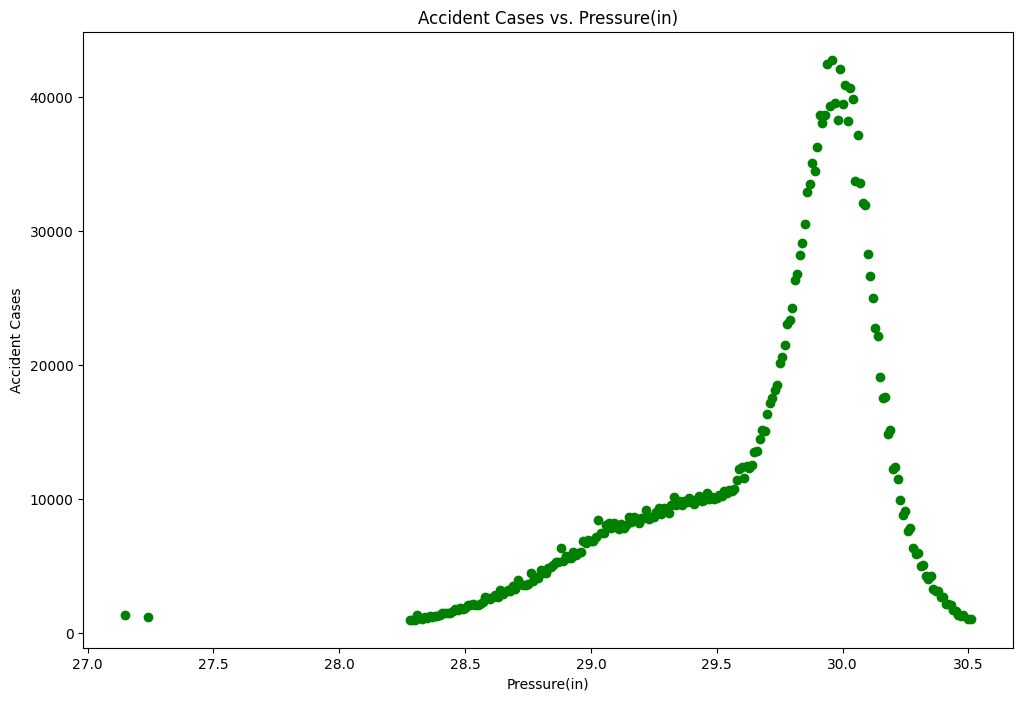

In [14]:
# Scatterplot for pressure vs. # of accident cases
plt.figure(figsize= (12,8))
plt.scatter(y = pressure['Accident Cases'], x = pressure['Pressure(in)'],color = 'green')
plt.ylabel('Accident Cases')
plt.xlabel('Pressure(in)')
plt.title('Accident Cases vs. Pressure(in)')
plt.show();

**Interpretation**  
Maximum accidents which were reported had the air pressure between 28.3 - 29.5 in inches.

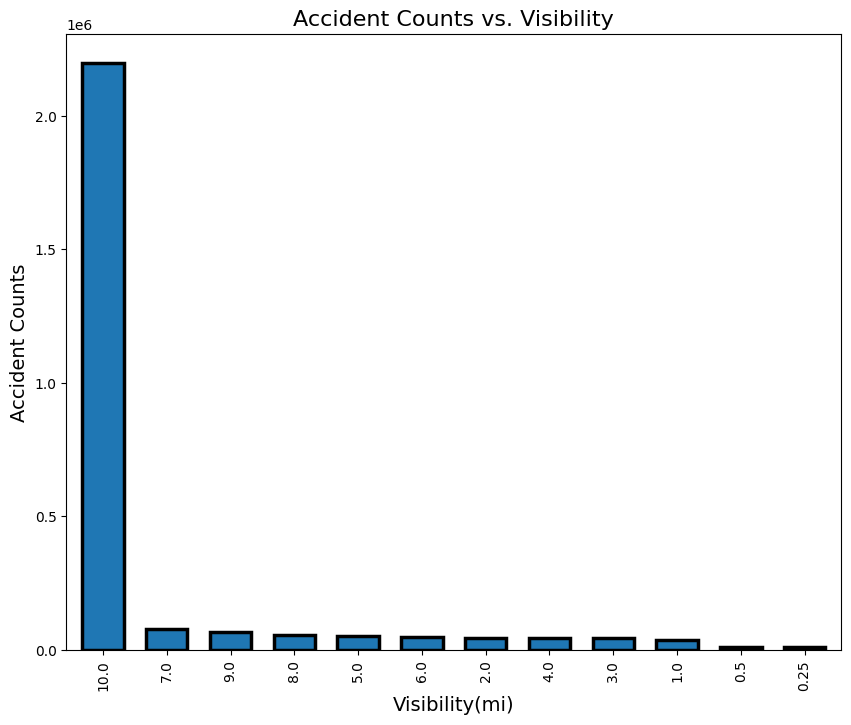

In [15]:
# Creating a bar plot for Visibility with top 10 occurences. 
fig = plt.gcf()
fig.set_size_inches(10, 8);
df['Visibility(mi)'].value_counts().sort_values(ascending = False).head(12).plot.bar(
    width = 0.65, edgecolor = 'k', align = 'center', linewidth = 2.5)
plt.xlabel('Visibility(mi)', fontsize = 14)
plt.ylabel('Accident Counts', fontsize = 14)
plt.title('Accident Counts vs. Visibility', fontsize = 16)
plt.show();

In [16]:
df['Visibility(mi)'].value_counts(normalize = True).head()

10.0    0.804284
7.0     0.028619
9.0     0.024794
8.0     0.020153
5.0     0.019389
Name: Visibility(mi), dtype: float64

**Interpretation**  
The most frequent mile visibility by far was 10 miles, with roughly 80.43% of accidents in our dataset occurring with 10 miles of visibility.

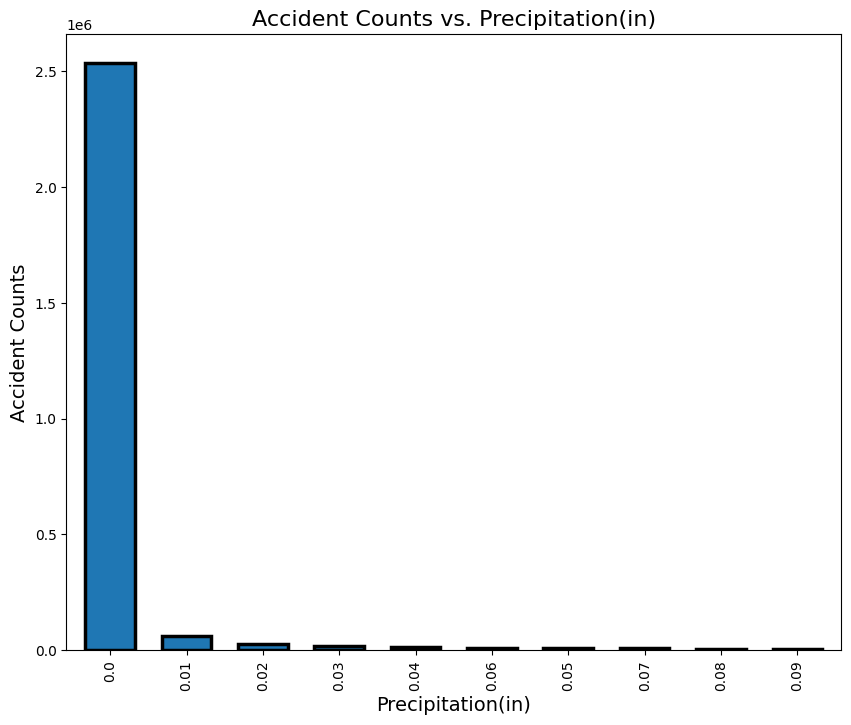

In [17]:
# create bar plot for precipitation with top 10 values 
fig = plt.gcf()
fig.set_size_inches(10, 8);
df['Precipitation(in)'].value_counts().sort_values(ascending = False).head(10).plot.bar(
    width = 0.65, edgecolor = 'k', align = 'center', linewidth = 2.5)
plt.xlabel('Precipitation(in)', fontsize = 14)
plt.ylabel('Accident Counts', fontsize = 14)
plt.title('Accident Counts vs. Precipitation(in)', fontsize = 16)
plt.show();

In [18]:
df['Precipitation(in)'].value_counts(normalize = True).head()

0.00    0.928134
0.01    0.021428
0.02    0.009574
0.03    0.006442
0.04    0.004997
Name: Precipitation(in), dtype: float64

**Interpretation**  
Roughly 92.81% of the accidents in our dataset occurred in conditions with zero precipitation.

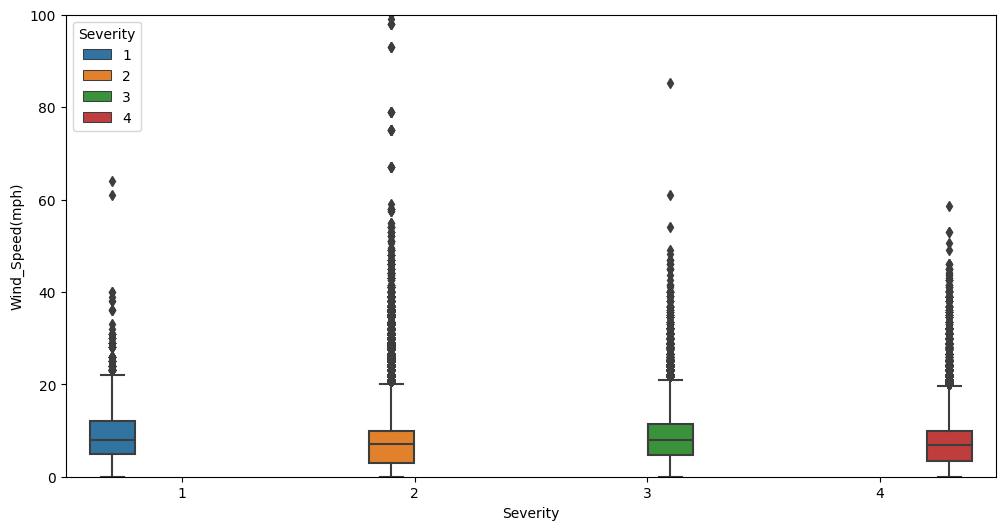

In [19]:
# Creating a box plot for wind speed based on accident severity.
plt.figure(figsize = (12,6))
sns.boxplot(x = 'Severity', y = 'Wind_Speed(mph)', data = df, hue = 'Severity')
plt.ylim(0, 100);

**Interpretation**  
The distribution of wind speeds per accident severity category doesn't differ much in regards to their 1st, 3rd quartiles, and medians. There are, however, many outliers for the severity 2 category. This is likely due to the imbalanced nature of our dataset, which places roughly 89.07% of our dataset in severity 2.

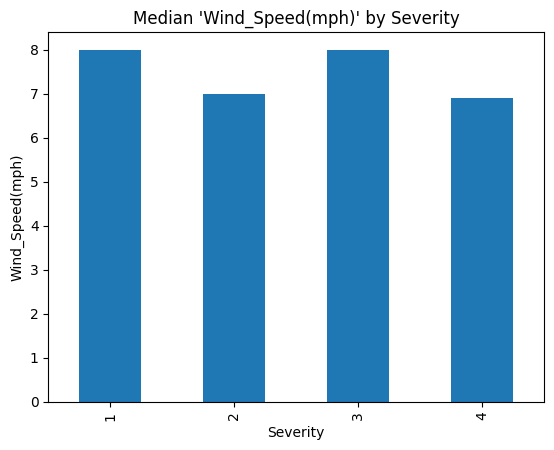

In [20]:
# Visualizing median wind speeds per accident severity category
df.groupby('Severity')['Wind_Speed(mph)'].median().plot(kind = 'bar')
plt.ylabel('Wind_Speed(mph)')
plt.title("Median 'Wind_Speed(mph)' by Severity")
plt.show()

**Interpretation**  
These bar plots further validate the statements made above regarding similar medians across accident severity categories. There doesn't appear to be a relationship between wind speed and accident severity.

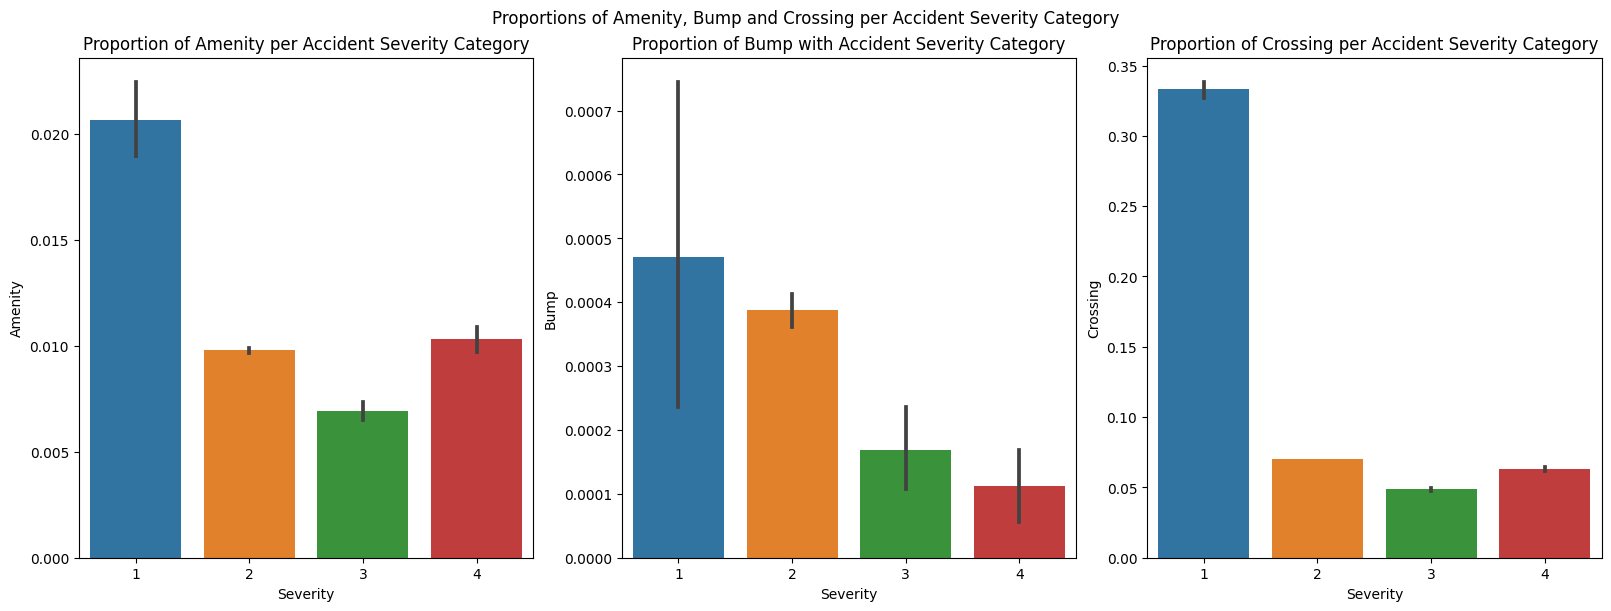

In [21]:
# Creating a bar plot for Amenity, Bump and Crossing based on accident severity category.
fig, ax = plt.subplots(1, 3, figsize = (16, 6), constrained_layout = True)
fig.suptitle('Proportions of Amenity, Bump and Crossing per Accident Severity Category')
sns.barplot(ax = ax[0], x = 'Severity', y = 'Amenity', data = df);
ax[0].set_title('Proportion of Amenity per Accident Severity Category')
sns.barplot(ax = ax[1], x = 'Severity', y = 'Bump', data = df)
ax[1].set_title('Proportion of Bump with Accident Severity Category')
sns.barplot(ax = ax[2], x = 'Severity', y = 'Crossing', data = df)
ax[2].set_title('Proportion of Crossing per Accident Severity Category')
plt.savefig('../images/prop_abc_per_severity.png')

**Interpretation**

- Accidents in severity 1 category had the highest proportion of amenities present near the accident location
- There's a negative relationship between the proportion of bumps present near the accident location and the accident severity category
- The majority of accidents that occurred with a presence of a bump were minor ones (severity 1 or 2 category)
- Majority of accidents where there was a crossing had severity of 1, followed by 2, 3 and 4. This suggests that crossings reduce the severity of accidents that occur


## Group 2 EDA: 

In [22]:
# Features in group 2
col_2 = ['Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
         'Traffic_Signal', 'Turning_Loop', 'Severity']
col_2_df = df[col_2].copy()

In [23]:
# Converting booleans to integers for visualization and analysis
for col in col_2_df.columns[:-1]:
    col_2_df[col] = col_2_df[col].apply(lambda x: 1 if x == True else 0)

In [24]:
# Exploring each explanatory variable's distributions
# Each column's count will be the same, while their 25-50-75% will be the same as well as they're all binary
for col in col_2_df.columns[:-1]:
    print(f'\n{col}: \n{col_2_df[col].describe()}')


Junction: 
count    2.731050e+06
mean     1.021494e-01
std      3.028447e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: Junction, dtype: float64

No_Exit: 
count    2.731050e+06
mean     1.521393e-03
std      3.897536e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: No_Exit, dtype: float64

Railway: 
count    2.731050e+06
mean     7.902089e-03
std      8.854179e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: Railway, dtype: float64

Roundabout: 
count    2.731050e+06
mean     4.284067e-05
std      6.545139e-03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: Roundabout, dtype: float64

Station: 
count    2.731050e+06
mean     2.403984e-02
std      1.531729e-01
min      0.000000e+00
25%      0.000000e+00
50%

There are only 0 values within Turning_Loop, so I'll be dropping this column moving forward.

In [25]:
col_2_df.drop('Turning_Loop', axis = 1, inplace = True)

All of my features are binary, categorical variables so I'll be constructing bar plots to visualize their distributions based on the target variable, severity.

In [26]:
# Finding each feature's proportions based on severity class
props = col_2_df.groupby('Severity').mean()
props

,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal
Severity,,,,,,,,
1,0.087533,0.006353,0.020942,0.000078,0.039570,0.020275,0.001020,0.461195
2,0.095644,0.001468,0.007694,0.000044,0.024753,0.018034,0.000625,0.088737
3,0.199715,0.001613,0.009074,0.000013,0.017274,0.008543,0.000437,0.108061
4,0.115706,0.001474,0.007894,0.000040,0.014990,0.021490,0.000354,0.102963


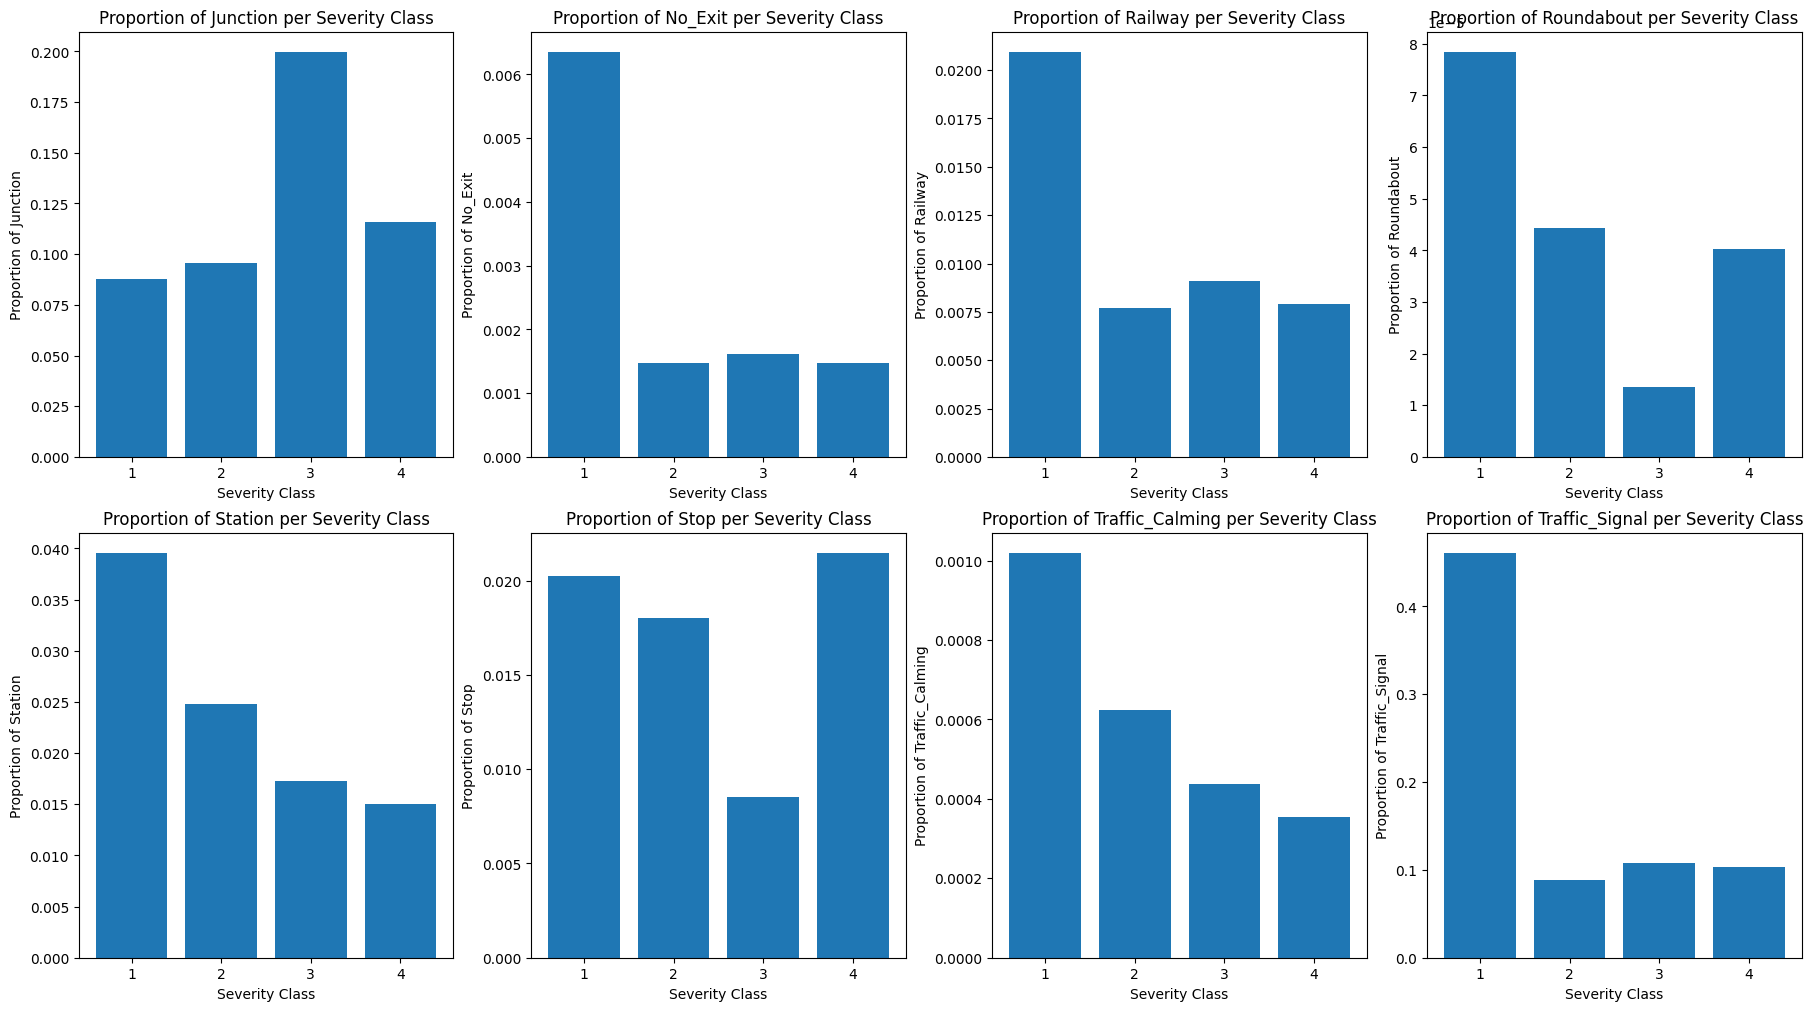

In [27]:
col_index = 0
fig, ax = plt.subplots(nrows = 2, ncols = 4, constrained_layout = True, figsize = (18, 10))
for i in range(2):
    for x in range(4):
        col_name = props.columns[col_index]
        ax[i][x].bar(props.index, props[col_name])
        ax[i][x].set_title(f'Proportion of {col_name} per Severity Class')
        ax[i][x].set_ylabel(f'Proportion of {col_name}')
        ax[i][x].set_xlabel('Severity Class')
        col_index += 1

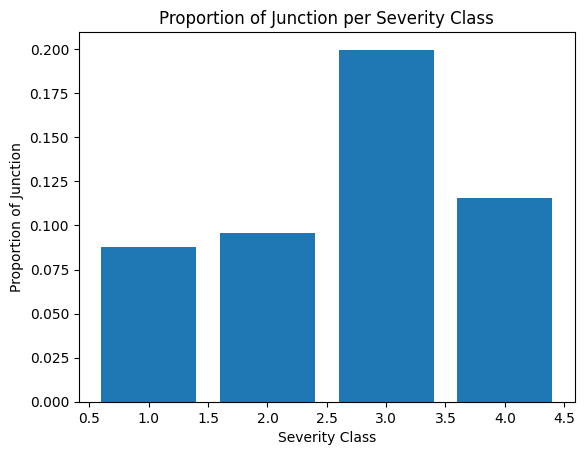

In [28]:
plt.bar(props.index, props['Junction'])
plt.title(f'Proportion of Junction per Severity Class')
plt.ylabel(f'Proportion of Junction')
plt.xlabel('Severity Class');
plt.savefig('../images/prop_junction_per_severity.png')

**Interpretation**
- Junctions are common amongst class 3 severities
- No_Exits are common amongst class 1 severities
- Railways are common amongst class 1 severities
- Roundabouts are common amongst class 1 severities, very uncommon amongst class 3 severities
- There's a negative correlation between severity class and the presence of a Railway Station
- Stops are uncommon amongst class 3 severities
- There's a negative correlation between severity class and the presence of Traffic_Calming measures
- Traffic_Signals are very common amongst class 1 severities

## Group 3 EDA: 

In [29]:
# Features in group 3
col_3 = ['Severity', 'Side', 'City', 'County', 'State', 'Timezone', 
        'Sunrise_Sunset', 'day', 'month', 'year', 'hour']

# Converting Start_Time to day, month, year, hour features
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['day'] = df['Start_Time'].dt.day
df['month'] = df['Start_Time'].dt.month
df['year'] = df['Start_Time'].dt.year
df['hour'] = df['Start_Time'].dt.hour

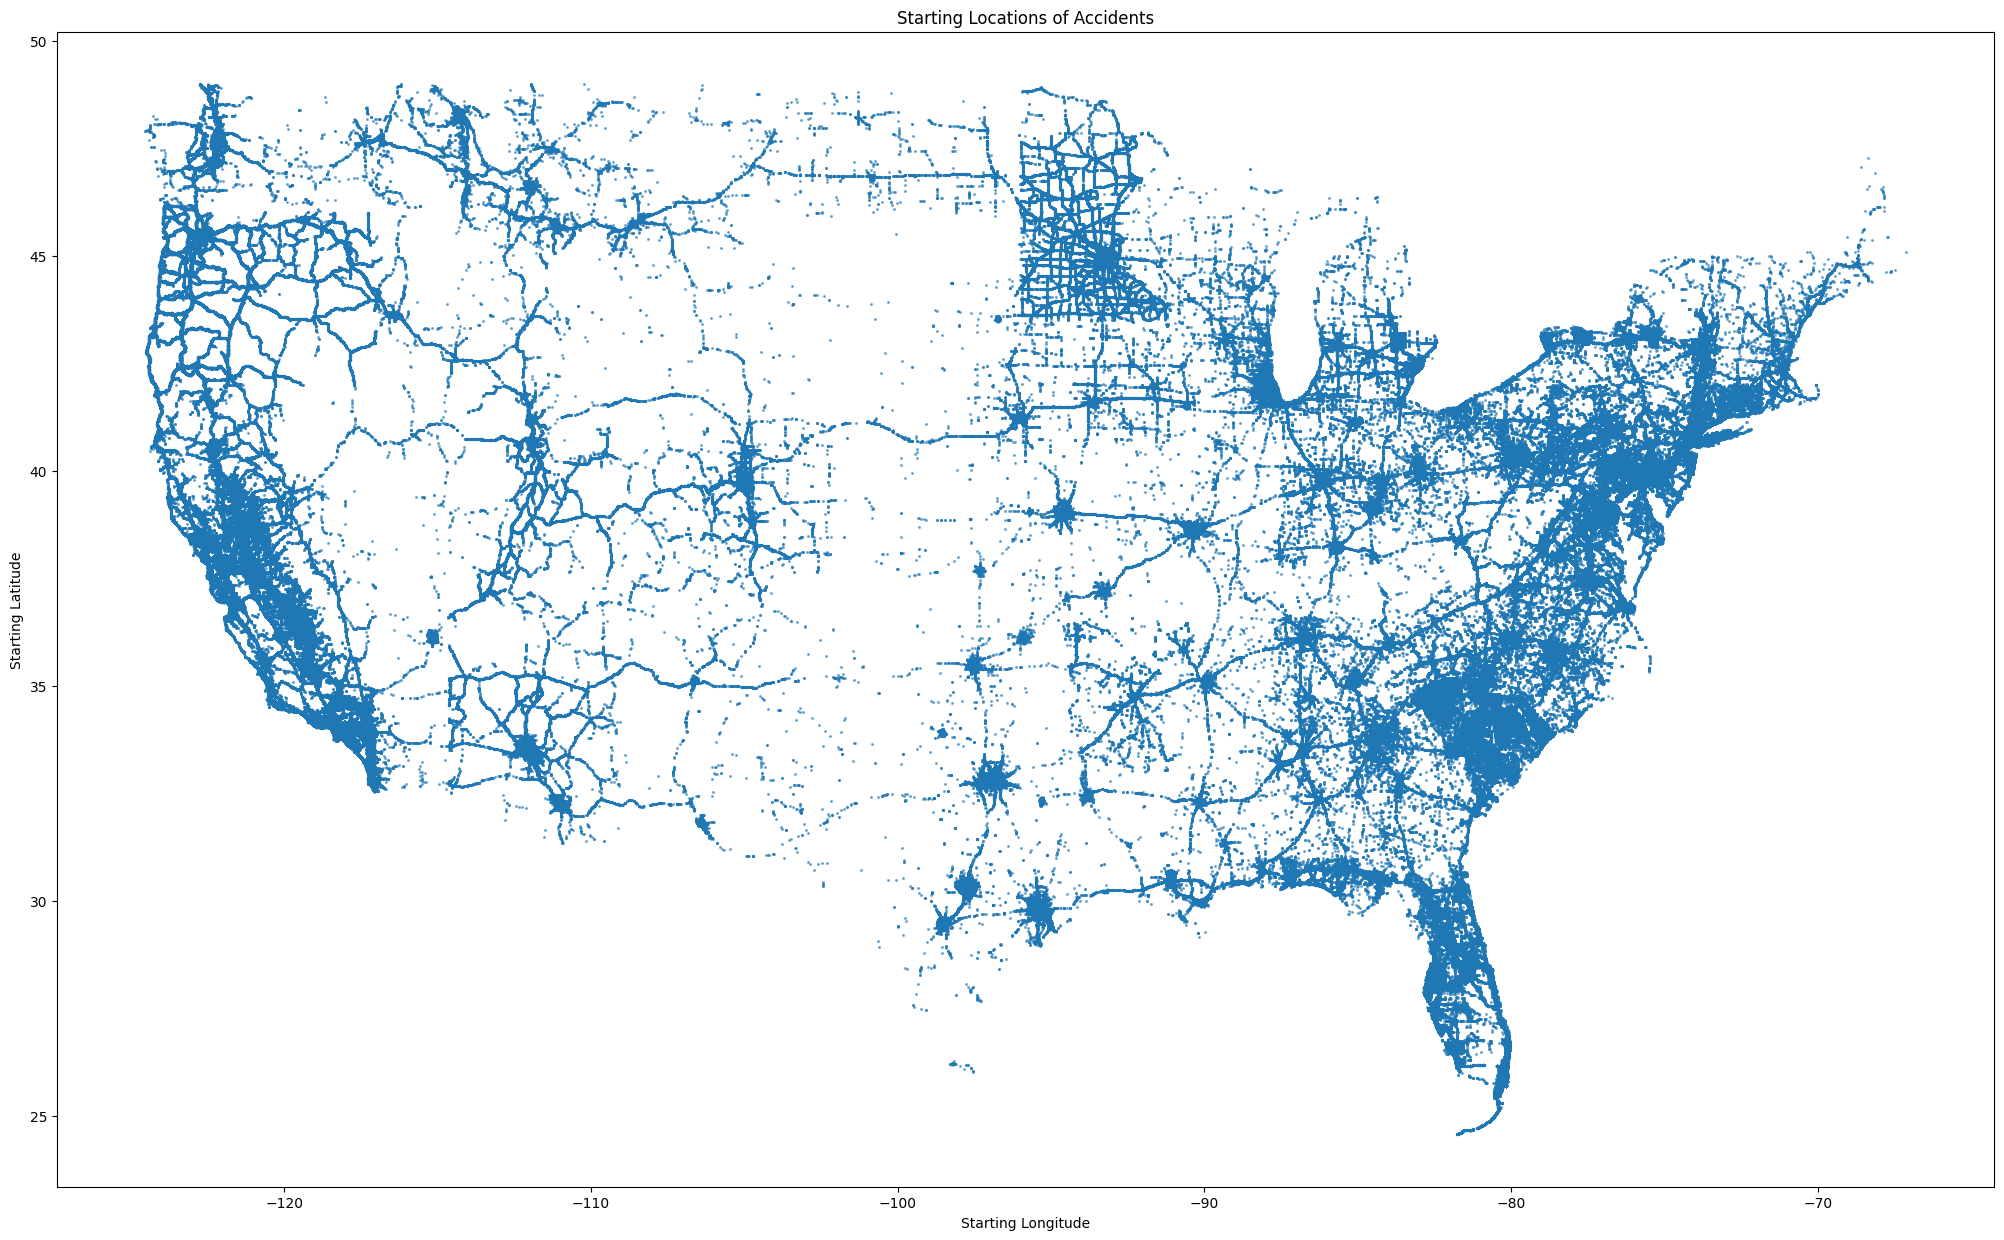

In [30]:
# Scatterplot for longitude and latitude of accident locations (where they began)
plt.figure(figsize = [25, 15])
plt.scatter(df["Start_Lng"], df["Start_Lat"], s = 1.5, alpha = .5)
plt.title('Starting Locations of Accidents')
plt.xlabel('Starting Longitude')
plt.ylabel('Starting Latitude');
plt.savefig('../images/accident_map.png')

**Interpretation**  
Accidents in our dataset are largely concentrated in coastal areas of the U.S.

In [31]:
# Function to create bar plots for each feature
def create_bar_lim(dataframe):
    for column in dataframe:
        if len(dataframe[column].value_counts()) > 10: 
            dataframe[column].value_counts()[:10].plot(kind = 'bar')
        else:
            dataframe[column].value_counts().plot(kind = 'bar')
        plt.title(column)
        plt.show()

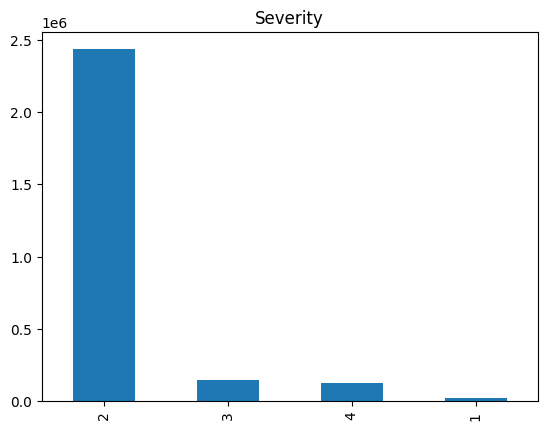

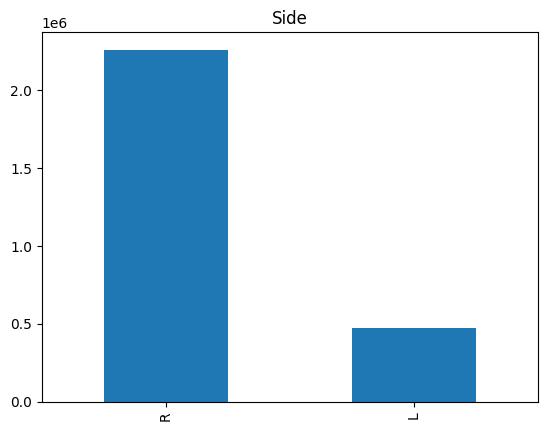

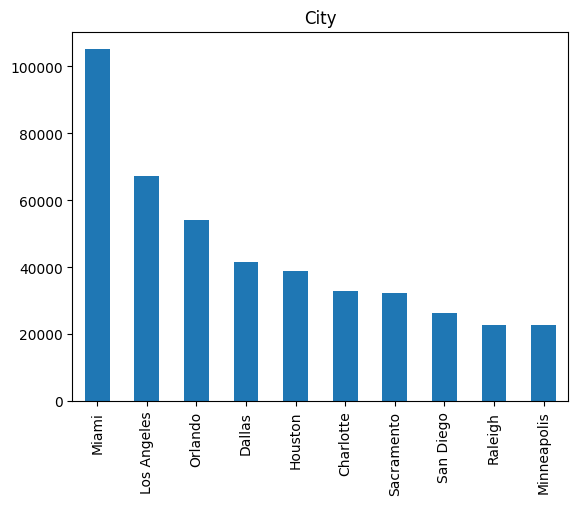

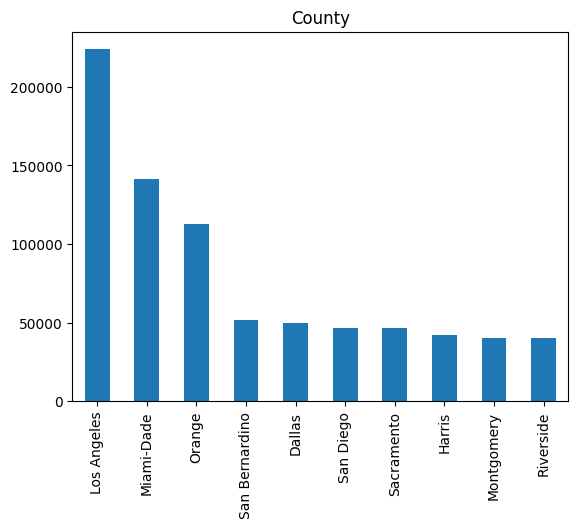

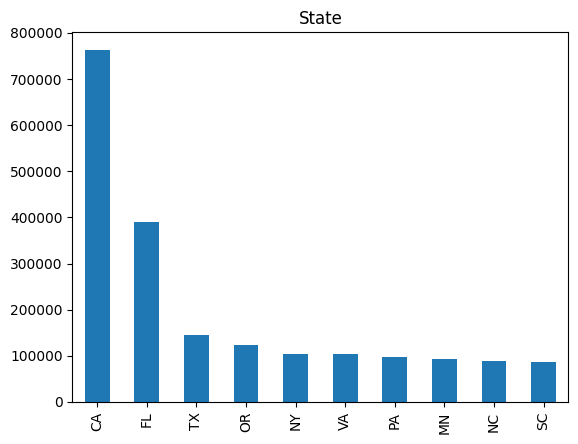

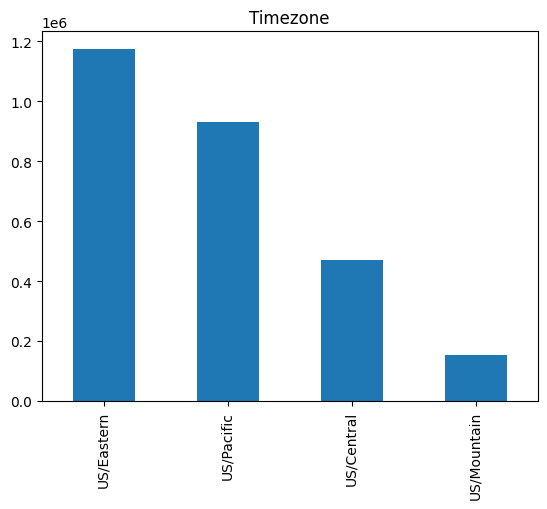

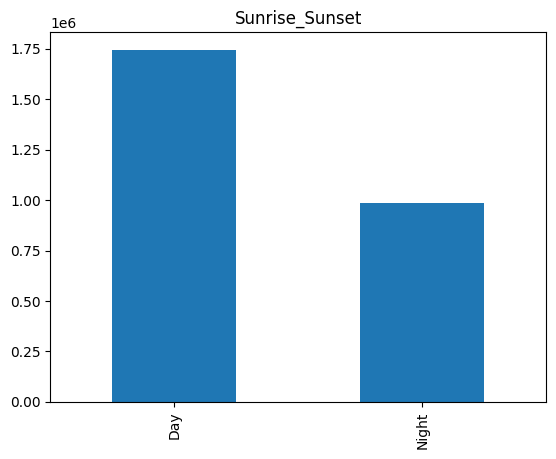

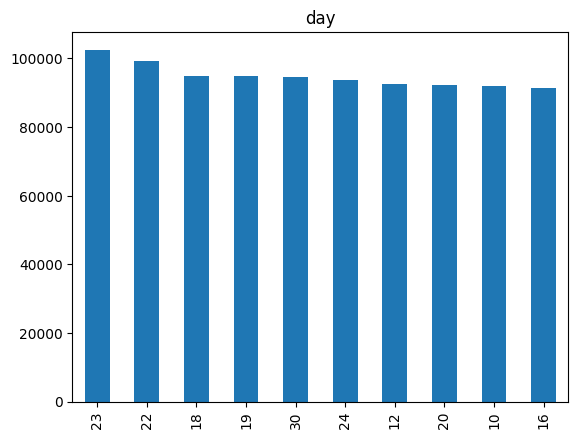

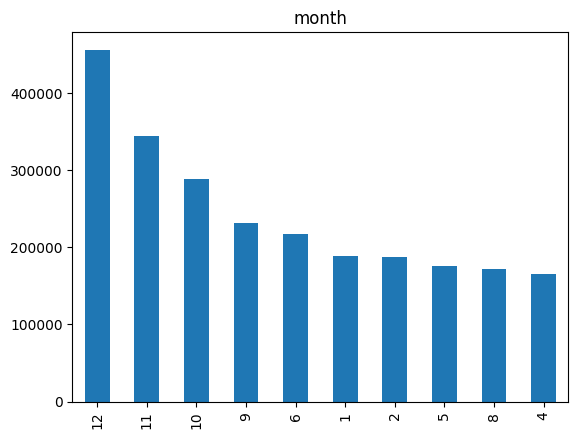

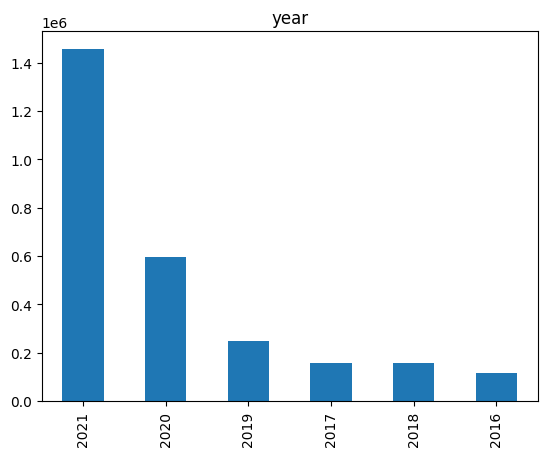

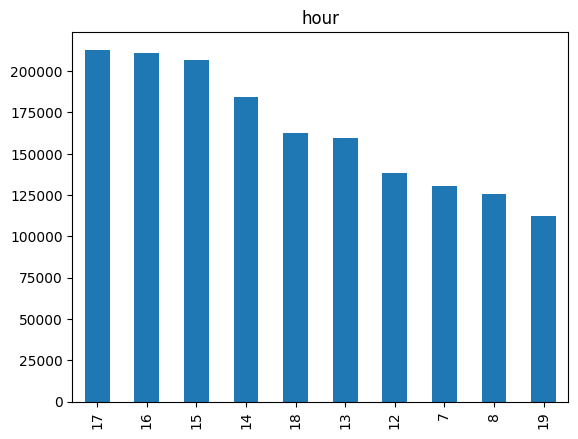

In [32]:
create_bar_lim(df[col_3])

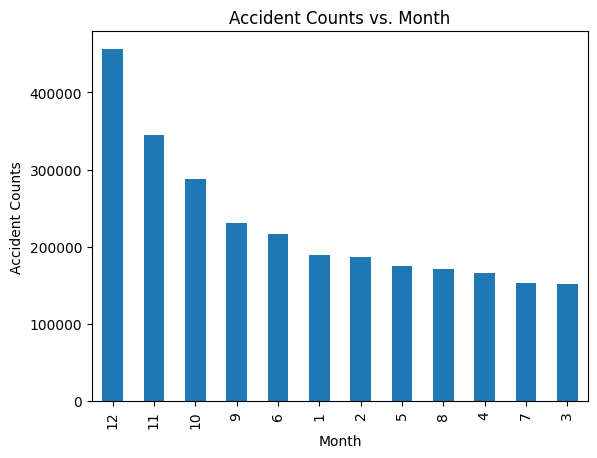

In [33]:
df['month'].value_counts().plot(kind = 'bar')
plt.ylabel('Accident Counts')
plt.xlabel('Month')
plt.title('Accident Counts vs. Month');
plt.savefig('../images/accident_frequency_with_month.png')

**Interpretation**  
- There's a much higher frequency of accidents occurring on the right side of the street. This makes sense given the U.S.'s right-hand traffic.
- The cities that constitute the highest number of accidents are: Miami, Los Angeles, Orlando, Dallas, Houston, Charlotte, Sacramento, San Diego, Raleigh, Minneapolis. There are a variety of reasons for why this could be the case, such as a higher proportion of drivers/bikers/etc., poor urban planning, etc. Further research can be done to validate these claims.
- The top 3 counties with the highest number of accidents: Los Angeles, Miami-Dade, Orange. Their respective frequencies far outweigh that of the other U.S. counties.
- The top 2 states with the highest number of accidents: CA, FL. Their respective frequencies far outweigh that of the other U.S. states.
- There seems to be a clear distinction between the frequency of accidents based on timezone
- There are roughly 1.75x the number of accidents during the day compared to night time, based on Sunrise/Sunset.
- A large majority of accidents occur towards the end of the year (months 10, 11, 12)
- There were significantly more accidents in 2021 relative to the rest of the dataset, which spans from 2016-2021.

In [34]:
# Examining the frequency of side of street categories (right or left) based on accident severity category
df.groupby("Severity")['Side'].value_counts().unstack().T

Severity,1,2,3,4
Side,,,,
L,5363,427217,12944,28042
R,20136,2005406,135833,96109


**Interpretation**  
This validates what was mentioned above, that many more accidents occur on the right side compared to left across all severity categories.

## Group 4 EDA: 

In [35]:
# Getting font dictionary
with open('styles.json') as f:
    plot_styles = json.load(f)

In [36]:
# Establishing One-Hot-Encoded Weather Condition and Type of Street (interstate, highway, other)
wc_cols = [c for c in df2.columns if c.startswith('wc_')]
st_cols = [c for c in df2.columns if c.startswith('st_')]
wcs_cols = wc_cols + ['Severity']
sts_cols = st_cols + ['Severity']
df2.head(1)

,wc_clouds,wc_dust,wc_fair,wc_fog,wc_ice,wc_rain,wc_snow,wc_thunder,wc_tornado,wc_wind,st_interstate,st_highway,st_other,Severity
0,0,0,0,0,0,1,0,0,0,0,0,0,1,3


### Weather Conditions

In [37]:
# Accident counts per weather condition category
df2[wc_cols].sum().sort_values(ascending = False) 

wc_fair       1272769
wc_clouds     1095520
wc_rain        193915
wc_fog          79493
wc_snow         56457
wc_wind         41918
wc_thunder      31865
wc_dust          7552
wc_ice           2079
wc_tornado          9
dtype: int64

**Interpretation**  
Most of the accidents in our dataset, independent of severity level, occurred in fair or cloudy weather conditions as opposed to worse weather conditions. This could be due to the fact that drivers may be letting their guards down in better weather conditions and are more attentive when the weather is worse.

In [38]:
# Tornado does not have enough data and doesn't show much so I'm dropping it here
# after moving its entries into 'wind' category
df2.loc[(df2['wc_wind'] == 0) & (df2['wc_tornado'] == 1), ['wc_wind']] = 1
df2.drop(columns = ['wc_tornado'], inplace = True)
wc_cols = [c for c in df2.columns if c.startswith('wc_')]
wcs_cols = wc_cols + ['Severity']

In [39]:
# Count of accidents per weather condition category, grouped by severity
wcs_sum = df2[wcs_cols].groupby('Severity').sum()
wcs_sum

,wc_clouds,wc_dust,wc_fair,wc_fog,wc_ice,wc_rain,wc_snow,wc_thunder,wc_wind
Severity,,,,,,,,,
1,10355,12,12795,247,3,1810,87,246,549
2,953544,7117,1154904,74430,1576,169845,49513,28657,38199
3,76082,137,52716,2390,222,13151,3102,1952,1761
4,55539,286,52354,2426,278,9109,3755,1010,1418


In [40]:
# Converting 4 severity categories into 2 severity levels (low/high)
wcs_sum = pd.DataFrame([wcs_sum[0:2].sum(), wcs_sum[2:4].sum()])

In [41]:
# Normalized count per weather condition, grouped by severity
wcs_sum_norm = wcs_sum.apply(lambda x: (x / sum(x)) * 100)
wcs_sum_norm

,wc_clouds,wc_dust,wc_fair,wc_fog,wc_ice,wc_rain,wc_snow,wc_thunder,wc_wind
0,87.985523,94.398835,91.744771,93.941605,75.949976,88.520744,87.854473,90.704535,92.417774
1,12.014477,5.601165,8.255229,6.058395,24.050024,11.479256,12.145527,9.295465,7.582226


**Interpretation**  
The largest difference in normalized count of accidents per severity category can be found in weather conditions involving ice, snow, and wind.

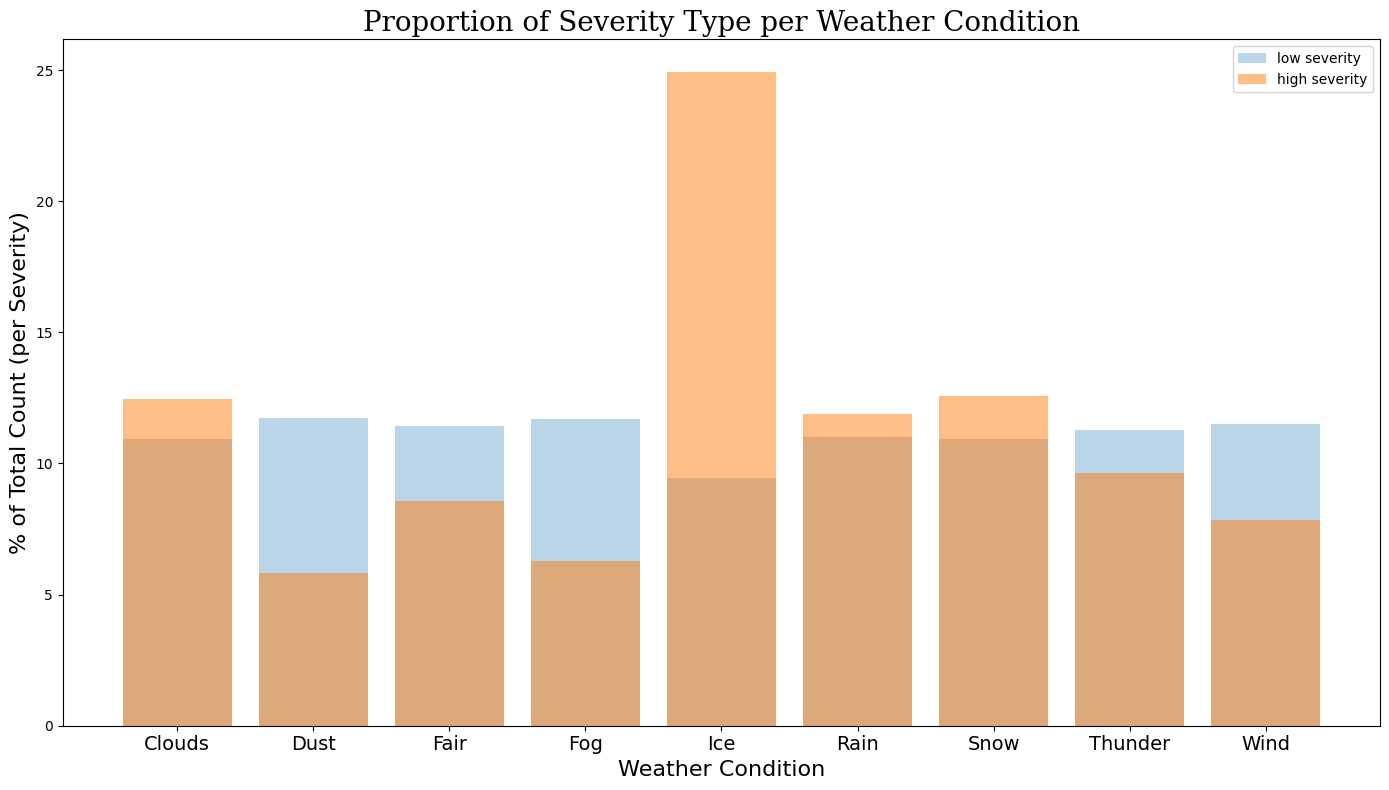

In [42]:
# Comparing severity 1/2 with 3/4, per condition, normalized for similar scale
# e.g. wc_clouds sev. 0 divided by all sev. 0
PLT_FNAME = "severity_per_weather_condition.png"
fig, ax = plt.subplots(figsize = (14,8))
ix12 = wcs_sum_norm.loc[0]
ix34 = wcs_sum_norm.loc[1]
ax.bar(wcs_sum_norm.columns, (ix12 / ix12.sum()) * 100, alpha = 0.3, label = "low severity")
ax.bar(wcs_sum_norm.columns, (ix34 / ix34.sum()) * 100, alpha = 0.5, label = "high severity")
ax.set_xticks(ax.get_xticks()) # to suppress warning
ax.set_xticklabels([c[3:].title() for c in wcs_sum_norm.columns], fontdict = plot_styles['tick-label'])
ax.set_xlabel('Weather Condition', fontdict = plot_styles['axis-label'])
ax.set_ylabel('% of Total Count (per Severity)', fontdict = plot_styles['axis-label'])
ax.set_title('Proportion of Severity Type per Weather Condition', fontdict = plot_styles['title'])
ax.legend();
plt.tight_layout()
plt.savefig(IMGDIR + PLT_FNAME, transparent = False)

**Interpretation**  
This graph shows severity counts for each weather condition, normalized. The values are calculated by dividing the severity count per condition by the total number of that severity (so e.g. 10 high severity clouds divided by total high severity accidents). Low severity accidents are about even across the board, but there is a large bump in high-severity accidents in icy conditions. Rain, snow, and cloud conditions show a small increase in % for high-severity accidents.

### Street Type

In [43]:
# Exploring the number of accidents per street type
df2[st_cols].sum()

st_interstate     752571
st_highway        663007
st_other         1315472
dtype: int64

In [44]:
# Count of accidents per street type, grouped by severity
sts_sum = df2[sts_cols].groupby('Severity').sum()
sts_sum

,st_interstate,st_highway,st_other
Severity,,,
1,4475,3737,17287
2,661119,585076,1186428
3,58717,40158,49902
4,28260,34036,61855


In [45]:
# Converting 4 severity categories into 2 severity levels (low/high)
sts_sum = pd.DataFrame([sts_sum[0:2].sum(), sts_sum[2:4].sum()])

In [46]:
# Normalized count per street type, grouped by severity
sts_sum_norm = sts_sum.apply(lambda x: (x / sum(x)) * 100)
sts_sum_norm

,st_interstate,st_highway,st_other
0,88.442685,88.80947,91.504418
1,11.557315,11.19053,8.495582


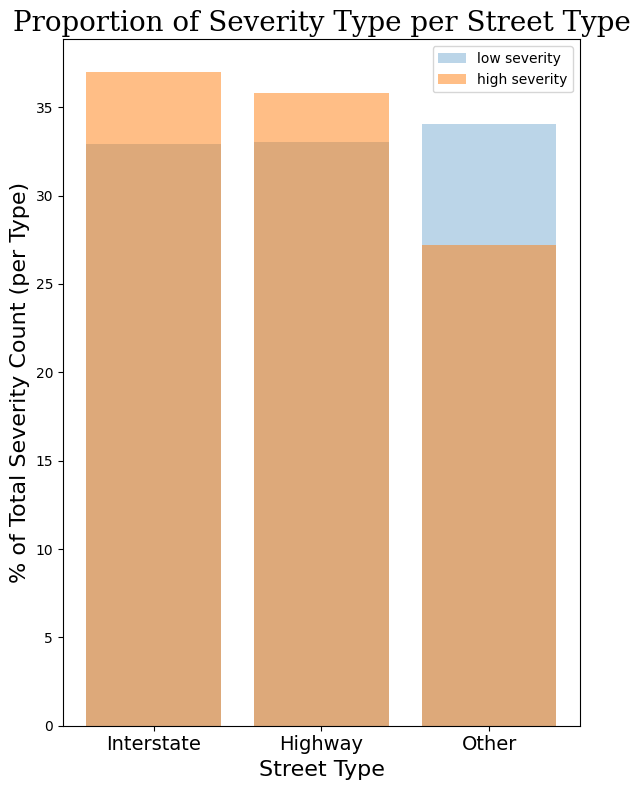

In [47]:
# Comparing severity 1/2 with 3/4, per street type, normalized for similar scale
PLT_FNAME = "severity_per_street_type.png"
fig, ax = plt.subplots(figsize=(6,8))
ix12 = sts_sum_norm.loc[0]
ix34 = sts_sum_norm.loc[1]
ax.bar(sts_sum_norm.columns, (ix12 / ix12.sum()) * 100, alpha=0.3, label="low severity")
ax.bar(sts_sum_norm.columns, (ix34 / ix34.sum()) * 100, alpha=0.5, label="high severity")
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels([c[3:].title() for c in sts_sum_norm.columns], fontdict=plot_styles['tick-label'])
ax.set_xlabel('Street Type', fontdict=plot_styles['axis-label'])
ax.set_ylabel('% of Total Severity Count (per Type)', fontdict=plot_styles['axis-label'])
ax.set_title('Proportion of Severity Type per Street Type', fontdict=plot_styles['title'])
ax.legend();
plt.tight_layout()
plt.savefig(IMGDIR + PLT_FNAME, transparent=False)

**Interpretation**  
This graph shows severity counts for each street type, normalized. Low-severity accidents are about even across the board, but there are slight bumps in high-severity accidents on or near interstates/highways. Low-severity accidents occur at a slightly higher rate on or near other kinds of roads.

In [ ]:
# Exporting df2
df.to_csv('../data/data-eda-wcst-20220916.01.csv', index = False)